1. Importing needed libraries

In [117]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

--------------------------------
2. Reading csv files, reviewing their features

In [67]:
yt = pd.read_csv('US_youtube_trending_data.csv')
cg = pd.read_csv('category_ids.csv')

In [68]:
# head of youtube data:
yt.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


So there are 16 columns. including:
- video_id
- title
- publishedAt
- channelId
- channelTitle
- categoryId
- trending_date
- tags
- view_count
- likes
- dislikes
- comment_count
- thumbnail_link
- comments_disabled
- ratings_disabled
- description

In [69]:
cg.head()

,categoryId,category
0,2,Autos & Vehicles
1,1,Film & Animation
2,10,Music
3,15,Pets & Animals
4,17,Sports


So there are two columns:
- categoryId
- category

-------------------------------------

3. Drop unneeded features of youtube's dataset (inplace):
- video_id
- channelId
- thumbnail_link
- comments_disabled
- ratings_disabled

In [70]:
yt.drop(columns=['video_id','channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'], inplace = True)

In [71]:
# See the result of the dropping:
yt[100:102]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description
100,WE DID IT,2020-08-09T19:54:58Z,Deji,24,2020-08-12T00:00:00Z,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...
101,"Game Theory: Minecraft, Stop Using Diamonds!",2020-08-08T18:05:14Z,The Game Theorists,20,2020-08-12T00:00:00Z,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...


--------------------------------
4. In the description of this part, the author says we usually need to convert a string-type feature which is a date to a datetime-type field. 

So, initially I show how to do that:

In [72]:
pd.to_datetime(yt['publishedAt'][100:102])

100   2020-08-09 19:54:58+00:00
101   2020-08-08 18:05:14+00:00
Name: publishedAt, dtype: datetime64[ns, UTC]

See the dtype of the output, the string-type rows are shown as datetime64 :)

If we didn't have the ability to use to_datetime, equivalently, we could use df.str.extract and using regex:

In [73]:
d = yt['publishedAt'][100:105].str.extract('(\d\d\d\d-\d\d-\d\d)T(\d\d:\d\d:\d\d)Z')
d.rename(columns={0:'date', 1:'time'}, inplace=True)
d

,date,time
100,2020-08-09,19:54:58
101,2020-08-08,18:05:14
102,2020-08-10,00:15:00
103,2020-08-10,02:00:06
104,2020-08-09,21:15:00


Of course, that's just for showing how to convert, now to convert on the real data:

In [74]:
yt['date_published'] = pd.to_datetime(yt['publishedAt']).dt.date
yt['date_published'] = pd.to_datetime(yt['date_published'])
yt.head()

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,date_published
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020-08-11
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",2020-08-11
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,2020-08-11
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020-08-11
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,2020-08-11


In [75]:
yt['time_published'] = pd.to_datetime(yt['publishedAt']).dt.time
yt[100:102]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,date_published,time_published
100,WE DID IT,2020-08-09T19:54:58Z,Deji,24,2020-08-12T00:00:00Z,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...,2020-08-09,19:54:58
101,"Game Theory: Minecraft, Stop Using Diamonds!",2020-08-08T18:05:14Z,The Game Theorists,20,2020-08-12T00:00:00Z,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,2020-08-08,18:05:14


In [76]:
yt['date_trending'] = pd.to_datetime(yt['trending_date']).dt.date
yt['date_trending'] = pd.to_datetime(yt['date_trending'])
yt[100:102]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,date_published,time_published,date_trending
100,WE DID IT,2020-08-09T19:54:58Z,Deji,24,2020-08-12T00:00:00Z,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...,2020-08-09,19:54:58,2020-08-12
101,"Game Theory: Minecraft, Stop Using Diamonds!",2020-08-08T18:05:14Z,The Game Theorists,20,2020-08-12T00:00:00Z,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,2020-08-08,18:05:14,2020-08-12


In [77]:
yt['time_trending'] = pd.to_datetime(yt['trending_date']).dt.time
yt[100:102]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,date_published,time_published,date_trending,time_trending
100,WE DID IT,2020-08-09T19:54:58Z,Deji,24,2020-08-12T00:00:00Z,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...,2020-08-09,19:54:58,2020-08-12,00:00:00
101,"Game Theory: Minecraft, Stop Using Diamonds!",2020-08-08T18:05:14Z,The Game Theorists,20,2020-08-12T00:00:00Z,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,2020-08-08,18:05:14,2020-08-12,00:00:00


Now, we can drop unnecessary columns that we used to convert!

In [78]:
yt.drop(columns=['publishedAt','trending_date'], inplace = True)

In [79]:
yt[100:102]

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,date_published,time_published,date_trending,time_trending
100,WE DID IT,Deji,24,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...,2020-08-09,19:54:58,2020-08-12,00:00:00
101,"Game Theory: Minecraft, Stop Using Diamonds!",The Game Theorists,20,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,2020-08-08,18:05:14,2020-08-12,00:00:00


----------------------------
5. Now, we want to use our dataset to extract months of those 2 columns we mentioned earlier, and create new columns based on them, which are:
- month_trending
- month_published

In [80]:
yt['month_trending'] = yt['date_trending'].dt.month
yt['month_published'] = yt['date_published'].dt.month

In [87]:
yt[800:802]

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,date_published,time_published,date_trending,time_trending,month_trending,month_published
800,"Last To Leave $800,000 Island Keeps It",MrBeast,24,[None],17365719,1599289,23874,166844,I can't believe I gave away a private island. ...,2020-08-15,20:00:02,2020-08-16,00:00:00,8,8
801,Drake - Laugh Now Cry Later (Official Music Vi...,DrakeVEVO,10,Drake|Laugh|Now|Cry|Later|OVO|Hip|Hop,17156758,1006096,24503,71191,Laugh Now Cry Later ft. Lil Durk available eve...,2020-08-14,04:00:08,2020-08-16,00:00:00,8,8


I checked many entries of this dataset, and I saw many of them with month 08 :)) that means something has anything to do with August :))

#### Replacing [8,9,10,11] to ['Aug','Sept','Oct','Nov']:

In [88]:
yt['month_trending'].replace([8,9,10,11], ['Aug','Sept','Oct','Nov'], inplace=True)
yt['month_published'].replace([8,9,10,11], ['Aug','Sept','Oct','Nov'], inplace=True)
yt[100:102]

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,date_published,time_published,date_trending,time_trending,month_trending,month_published
100,WE DID IT,Deji,24,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...,2020-08-09,19:54:58,2020-08-12,00:00:00,Aug,Aug
101,"Game Theory: Minecraft, Stop Using Diamonds!",The Game Theorists,20,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,2020-08-08,18:05:14,2020-08-12,00:00:00,Aug,Aug


----------------------------
6. Calculate the lag time (the difference time of published date and trending date):

In [89]:
yt['lag'] = yt['date_trending'] - yt['date_published']
yt[100:102]

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
100,WE DID IT,Deji,24,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...,2020-08-09,19:54:58,2020-08-12,00:00:00,Aug,Aug,3 days
101,"Game Theory: Minecraft, Stop Using Diamonds!",The Game Theorists,20,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,2020-08-08,18:05:14,2020-08-12,00:00:00,Aug,Aug,4 days


---------------------------
7. We want to replace category_ids to the names of those categories, which are available in another dataset, named category_ids
   
the name of dataframe is cg.

What is category? here:

In [91]:
cg.head()

,categoryId,category
0,2,Autos & Vehicles
1,1,Film & Animation
2,10,Music
3,15,Pets & Animals
4,17,Sports


in our youtube dataset, category would be like this:

In [93]:
yt['categoryId'].head()

0    22
1    20
2    24
3    10
4    26
Name: categoryId, dtype: int64

So, for example we want to replace 10 to Music. Because the name of categoryId=10 in category_ids.csv is Music. All of them should be mapped and replaced.

So, to do that, df.replace() gets 2 args, to_replace and value, which here should be both list. to_replace is the ids and value is the names of those ids:

In [94]:
category_ids = cg['categoryId'].tolist()
category_names = cg['category'].tolist()
yt['categoryId'].replace(category_ids, category_names, inplace=True)

In [95]:
yt[100:102]

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
100,WE DID IT,Deji,Entertainment,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...,2020-08-09,19:54:58,2020-08-12,00:00:00,Aug,Aug,3 days
101,"Game Theory: Minecraft, Stop Using Diamonds!",The Game Theorists,Gaming,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,2020-08-08,18:05:14,2020-08-12,00:00:00,Aug,Aug,4 days


------------------------------
8. Changing columns' names for better understanding:

In [96]:
new_col_names = {'channelTitle':'channel', 'categoryId':'category', 'view_count':'views', 'comment_count':'comments'}
yt.rename(columns = new_col_names, inplace=True)

In [97]:
yt[100:102]

,title,channel,category,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
100,WE DID IT,Deji,Entertainment,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...,2020-08-09,19:54:58,2020-08-12,00:00:00,Aug,Aug,3 days
101,"Game Theory: Minecraft, Stop Using Diamonds!",The Game Theorists,Gaming,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,2020-08-08,18:05:14,2020-08-12,00:00:00,Aug,Aug,4 days


------------------------------
9. Dropping duplicates of titles of youtube dataset, but keeping the first occurence of those duplicates:

In [98]:
yt.drop_duplicates(subset='title', keep='first', inplace=True)

In [99]:
yt[100:102]

,title,channel,category,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
100,WE DID IT,Deji,Entertainment,[None],1547751,232695,4065,12748,FOLLOW MY REDDIT: https://www.reddit.com/r/Dej...,2020-08-09,19:54:58,2020-08-12,00:00:00,Aug,Aug,3 days
101,"Game Theory: Minecraft, Stop Using Diamonds!",The Game Theorists,Gaming,minecraft|minecraft theory|minecraft diamonds|...,2657891,154064,6509,21993,Thanks Honey for sponsoring! Get the best dea...,2020-08-08,18:05:14,2020-08-12,00:00:00,Aug,Aug,4 days


------------------------------
------------------------------
------------------------------

#### Second Part: Analysis and Deduction

10. Sort data based on like, in descending order:

In [100]:
yt.sort_values('likes', ascending = False, inplace = True)
yt.head()

,title,channel,category,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
1800,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020-08-21,03:58:10,2020-08-21,00:00:00,Aug,Aug,0 days
3200,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,51234434,5912778,405329,1847794,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,2020-08-28,04:00:11,2020-08-28,00:00:00,Aug,Aug,0 days
10201,BLACKPINK – ‘Lovesick Girls’ M/V,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,39363127,4746270,17513,1021283,BLACKPINK – ‘Lovesick Girls’영원한 밤창문 없는 방에 우릴 가...,2020-10-02,04:00:13,2020-10-02,00:00:00,Oct,Oct,0 days
2602,BTS (방탄소년단) 'Dynamite' Official MV (B-side),Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,23493158,4238883,56358,339379,BTS (방탄소년단) 'Dynamite' Official MV (B-side)Cre...,2020-08-24,15:00:01,2020-08-25,00:00:00,Aug,Aug,1 days
1400,BTS (방탄소년단) 'Dynamite' Official Teaser,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,31964452,3858943,71828,828929,BTS (방탄소년단) 'Dynamite' Official TeaserBTS (방탄소...,2020-08-18,15:00:02,2020-08-19,00:00:00,Aug,Aug,1 days


Hoooof, BTS!! This is not the world we should live :(

------------------
11. Count the number of videos published daily:

In [136]:
yt_title_published = yt[['title', 'date_published']]
yt_daily_count = yt_title_published.groupby('date_published').count()
yt_daily_count.rename(columns={'title' : 'Count'}, inplace=True)
yt_daily_count.head()

,Count
date_published,
2020-08-03,1
2020-08-05,4
2020-08-06,22
2020-08-07,34
2020-08-08,29


-----------------------
12. Plot the yt_daily_count

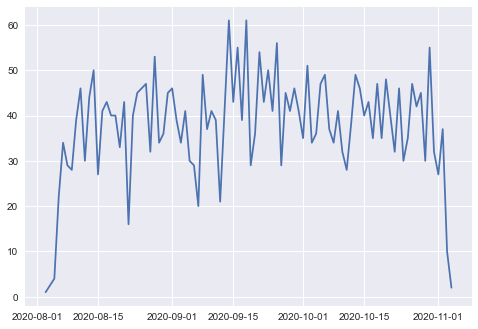

In [130]:
plt.plot(yt_daily_count['Count'])

It's a plot on the number of videos published in each day. It is obvious that in weekends (specially in saturdays), the number of published videos dramatically decreases. However, in the middle of each week, contrariwise, the number of videos increases.
If the contributers and publishers have less activity in those days, IMO the reason behind that is people go outside, and don't see much of videos on youtube those days.

-------------------------
13. Information of Months (Published, Trending, Views)

In [182]:

month_stats = yt[['date_published', 'title']].groupby(pd.Grouper(key='date_published',freq='M')).count().rename(columns={'title':'Published'})
month_stats['Trending'] = yt[['date_trending', 'title']].groupby(pd.Grouper(key='date_trending',freq='M')).count()
month_stats['Views'] = yt[['date_published', 'views']].groupby(pd.Grouper(key='date_published',freq='M')).sum()
month_stats.set_index(pd.Index(['Aug', 'Sept', 'Oct', 'Nov']), inplace=True)

month_stats.head()

,Published,Trending,Views
Aug,988,943,1455745669
Sept,1237,1236,1462007478
Oct,1239,1217,1735868034
Nov,76,144,84883540


So, October is most views, and published month.

-------------------------
14. Use histogram plotting on the lag time we calculate in 6

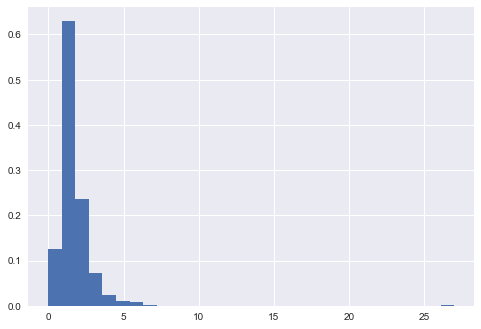

In [183]:

lag_data = yt['lag'].dt.days
# The towers or bars of a histogram are called bins.
# The number of days is 30, with an exception which is August.
plt.hist(lag_data, bins=30, density=True)
plt.show()

Based on the plot, we find out that the difference days between trending and published day of 62% of the videos are between ~1 and ~2

And 15% of the videos are between 0 and ~1.

And 22% of the videos, between ~1 and ~2 days.

And 8% of the videos are between ~2 and 3 days.

and 2% of them are between ~3 and 4 days.

And it goes on..

----------------------------
15. Showing most liked videos in the specific month in out dataframe

In [189]:
month_name = input('Month for most liked videos (Aug, Sept, Oct, Nov)? ').strip()
num_of_videos_to_see = int(input('How many videos to see? ').strip())
month_df = yt.loc[yt['month_published'] == month_name]
like_sorted_month = month_df.sort_values('likes', ascending = False)
videos = like_sorted_month.iloc[0:num_of_videos_to_see, :]
videos.head()

,title,channel,category,tags,views,likes,dislikes,comments,description,date_published,time_published,date_trending,time_trending,month_trending,month_published,lag
1800,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020-08-21,03:58:10,2020-08-21,00:00:00,Aug,Aug,0 days
3200,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,Music,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,51234434,5912778,405329,1847794,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,2020-08-28,04:00:11,2020-08-28,00:00:00,Aug,Aug,0 days
2602,BTS (방탄소년단) 'Dynamite' Official MV (B-side),Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,23493158,4238883,56358,339379,BTS (방탄소년단) 'Dynamite' Official MV (B-side)Cre...,2020-08-24,15:00:01,2020-08-25,00:00:00,Aug,Aug,1 days
1400,BTS (방탄소년단) 'Dynamite' Official Teaser,Big Hit Labels,Music,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,31964452,3858943,71828,828929,BTS (방탄소년단) 'Dynamite' Official TeaserBTS (방탄소...,2020-08-18,15:00:02,2020-08-19,00:00:00,Aug,Aug,1 days
51,Cardi B - WAP feat. Megan Thee Stallion [Offic...,Cardi B,Music,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,Cardi B - WAP feat. Megan Thee StallionStream/...,2020-08-07,04:00:10,2020-08-12,00:00:00,Aug,Aug,5 days


------------------
16. Most viewed channels in each month, plotting them.

In [206]:
channels = yt[['channel','views','month_trending']]
channels.reset_index(drop=True,inplace=True)
channels = channels.drop_duplicates(subset='channel', keep='first')
# sort based on month
channels.sort_values('month_trending')
channels.reset_index(drop=True)

channels.set_index("channel", inplace=True)
channels.head()

,views,month_trending
channel,,
Big Hit Labels,57229275,Aug
BLACKPINK,51234434,Aug
BANGTANTV,16398436,Oct
Cardi B,76805026,Aug
HarryStylesVEVO,16062539,Oct


In [245]:
import warnings
warnings.filterwarnings('ignore')
aug_channel = channels.loc[channels["month_trending"] == "Aug"]
aug_top_views_channel = aug_channel.nlargest(10,'views')
aug_top_views_channel.head()


,views,month_trending
channel,,
Cardi B,76805026,Aug
Big Hit Labels,57229275,Aug
BLACKPINK,51234434,Aug
TREASURE (트레저),18534845,Aug
Warner Bros. Pictures,13849593,Aug


In [246]:
sept_channel = channels.loc[channels["month_trending"] == "Sept"]
sept_top_views_channel = sept_channel.nlargest(10,'views')
sept_top_views_channel.head()


,views,month_trending
channel,,
LadyGagaVEVO,19296421,Sept
Brawl Stars,14445277,Sept
J97,14429622,Sept
Magic: The Gathering,11256073,Sept
RauwAlejandroTv,10900724,Sept


In [248]:
oct_channel = channels.loc[channels["month_trending"] == "Oct"]
oct_top_views_channel = oct_channel.nlargest(10,'views')
oct_top_views_channel.head()

,views,month_trending
channel,,
Zee Music Company,30452631,Oct
Apple,24125686,Oct
Hornstromp Games,16594442,Oct
BANGTANTV,16398436,Oct
HarryStylesVEVO,16062539,Oct


In [255]:
nov_channel = channels.loc[channels["month_trending"] == "Nov"]
nov_top_views_channel = nov_channel.nlargest(10,'views')
nov_top_views_channel.head()

,views,month_trending
channel,,
James Charles,11774104,Nov
charli d'amelio,6117906,Nov
LARRAY,5408222,Nov
Serie A,5323957,Nov
Jaiden Animations,3885698,Nov


In [256]:
months_names_dict = {"Aug": aug_top_views_channel, "Sept": sept_top_views_channel, "Oct": oct_top_views_channel, "Nov": nov_top_views_channel}

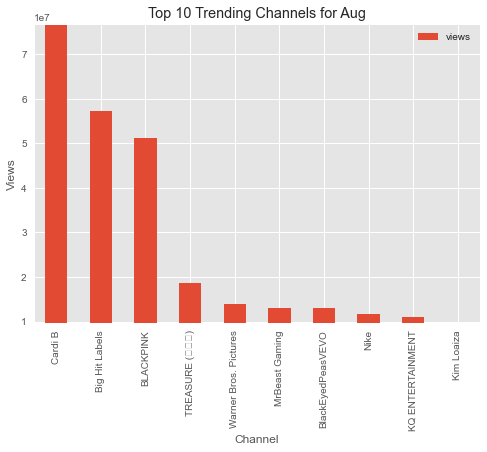

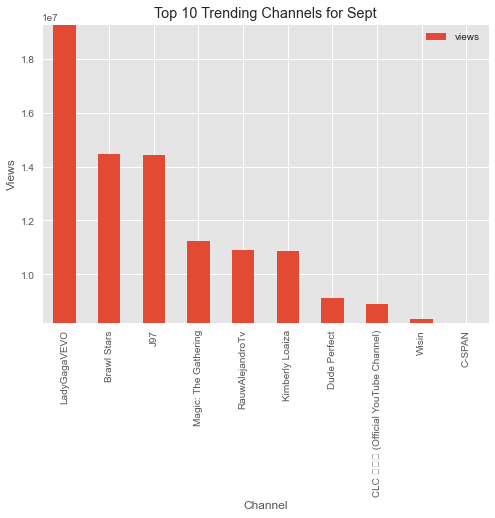

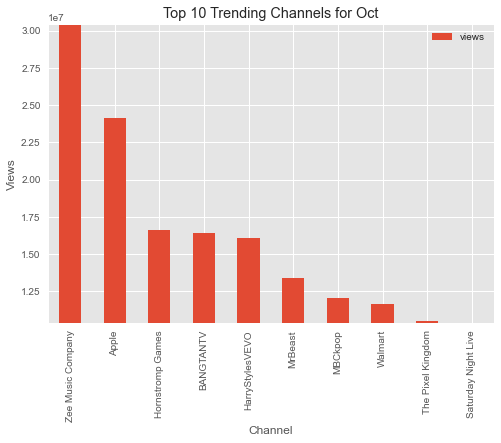

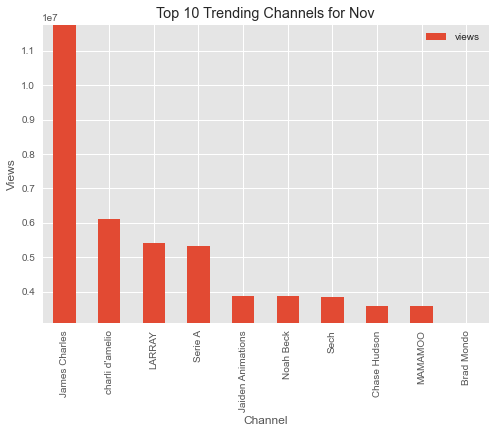

In [253]:

for month, month_df in months_names_dict.items():
    month_df[:10].plot(kind="bar")
    top_views_max = month_df['views'].max()
    top_views_min = month_df['views'].min()
    plt.ylim(top_views_min, top_views_max)
    plt.title(f"Top 10 Trending Channels for {month}")
    plt.xlabel("Channel")
    plt.ylabel("Views")

------------------
17. Statistics of Likes and Dislikes in each category, percentage of likes to all, and dislikes to all.

In [267]:
category_df = yt[['category', 'title']].groupby('category').count().rename(columns={'title':'No. of Published'})

category_df['likes'] = yt[['category', 'likes']].groupby('category').sum()
category_df['dislikes'] = yt[['category', 'dislikes']].groupby('category').sum()

category_df['total_opinions'] = category_df['likes'] + category_df['dislikes'] 

category_df['%like'] = (category_df['likes'] / category_df['total_opinions']).apply(lambda x: "{:.2%}".format(x))
category_df['%dislike'] = (category_df['dislikes'] / category_df['total_opinions']).apply(lambda x: "{:.2%}".format(x))

category_df

,No. of Published,likes,dislikes,total_opinions,%like,%dislike
category,,,,,,
Autos & Vehicles,64,2690151,35494,2725645,98.70%,1.30%
Comedy,211,21223879,185739,21409618,99.13%,0.87%
Education,82,4598979,73482,4672461,98.43%,1.57%
Entertainment,655,75892510,1182896,77075406,98.47%,1.53%
Film & Animation,123,8840688,133174,8973862,98.52%,1.48%
Gaming,311,34832291,838494,35670785,97.65%,2.35%
Howto & Style,149,7833598,209918,8043516,97.39%,2.61%
Music,798,162883104,3056306,165939410,98.16%,1.84%
News & Politics,153,2357393,318359,2675752,88.10%,11.90%


18. Plot number of videos published in each category

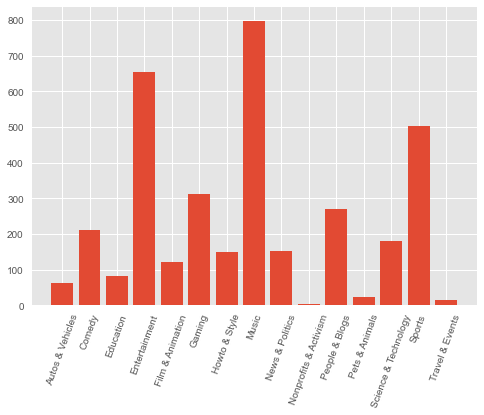

In [275]:
videos_plot_x = category_df.index
videos_plot_y = category_df['No. of Published']
plt.bar(videos_plot_x, videos_plot_y)
plt.xticks(rotation=70)
plt.show()

19. Plotting reactions of specific dates (days) of dataframe using Scatterplot

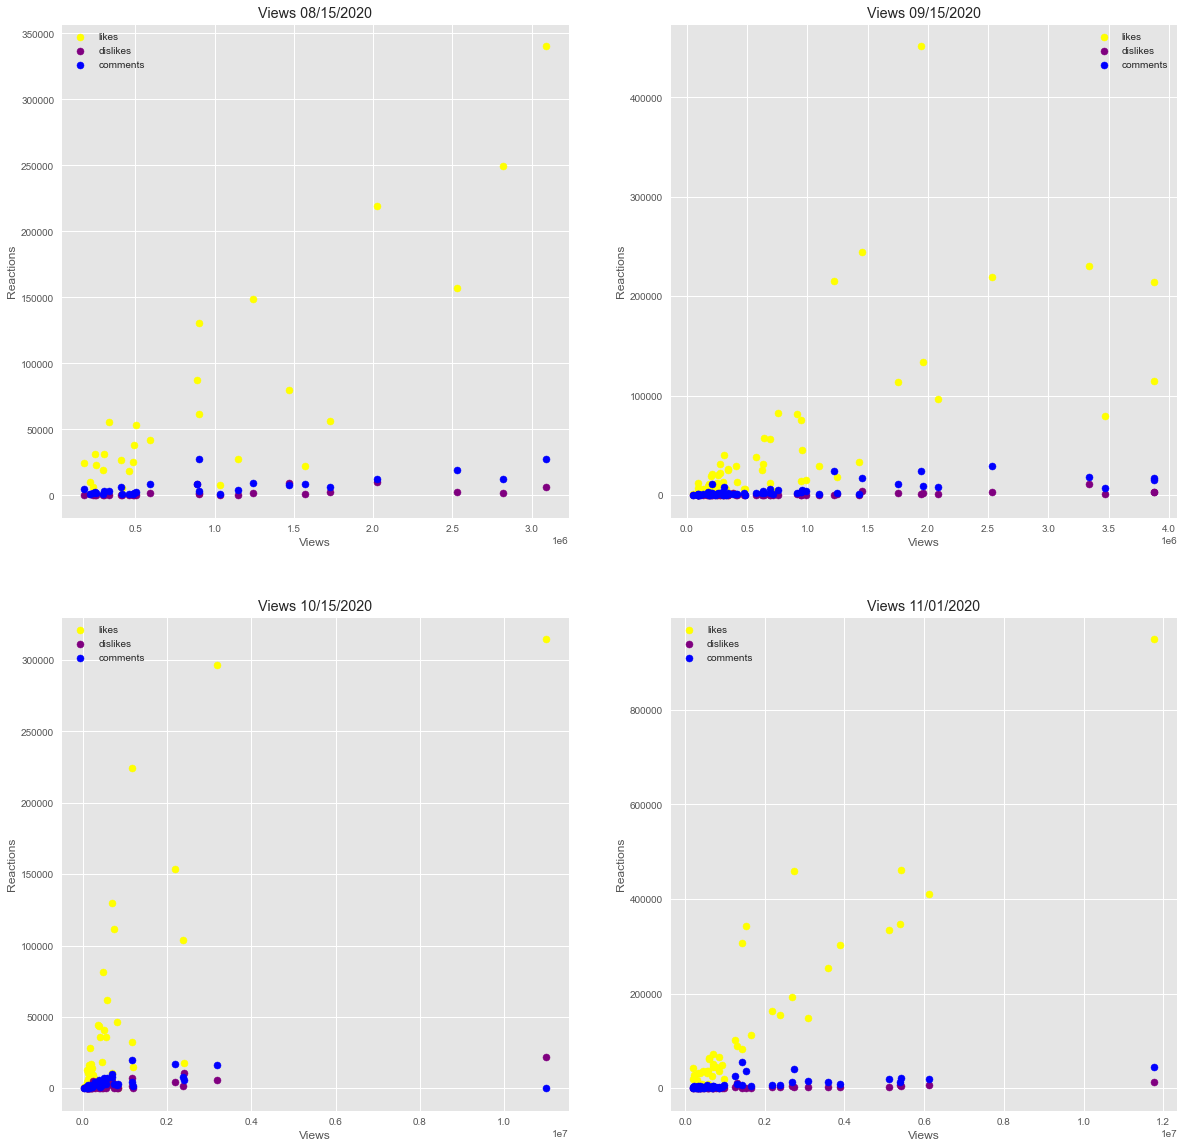

In [291]:
fig, (ax) = plt.subplots(2, figsize=(20, 20))
dates_for_plot = ['08/15/2020', '09/15/2020', '10/15/2020', '11/01/2020']
i = 1
for date in dates_for_plot:
    yt_date = yt[yt['date_trending'] == date]
    ax = plt.subplot(2, 2, i)
    i += 1
    ax.scatter(yt_date['views'], yt_date['likes'], color='yellow')
    ax.scatter(yt_date['views'], yt_date['dislikes'], color='purple')
    ax.scatter(yt_date['views'], yt_date['comments'], color='blue')
    ax.set(title=f'Views {date}', ylabel='Reactions', xlabel='Views')
    ax.legend(['likes', 'dislikes', 'comments'])